In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 連続NDフィルタ

NDL-10C-2

https://www.thorlabs.co.jp/newgrouppage9.cfm?objectgroup_id=1623&pn=NDL-10C-2

$$
    T:透過率 \quad OD:光学濃度 \\
    OD = \log_{10} (\frac{1}{T}) \quad or \quad T = 10^{-OD}
$$


In [51]:
def optical_density(length):
    """
    length: mm
    """
    if length < 0:
        print("Error: Length must be greater than 0")
        return None
    elif length <= 5:
        return 0
    elif length <= 50:
        return (length-5) * 2 / 45
    else:
        print("Error: Length must be less than or equal to 50")
        return None

In [52]:
def transmisson(od):
    """
    od: optical density
    """
    return 10 ** (-od)

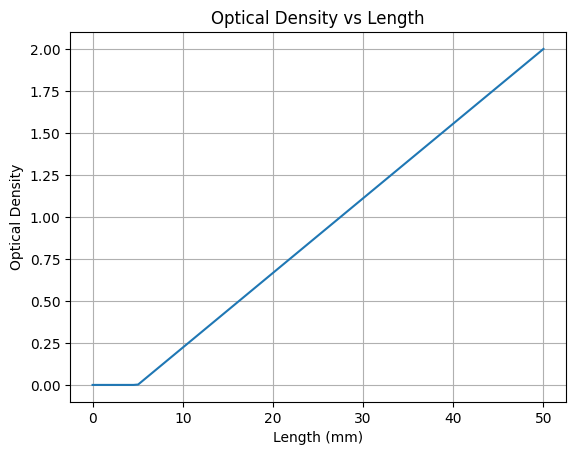

In [53]:
xlist = np.linspace(0, 50, 100)
ylist = [optical_density(x) for x in xlist]
plt.plot(xlist, ylist)
plt.xlabel("Length (mm)")
plt.ylabel("Optical Density")
plt.title("Optical Density vs Length")
plt.grid()
plt.show()

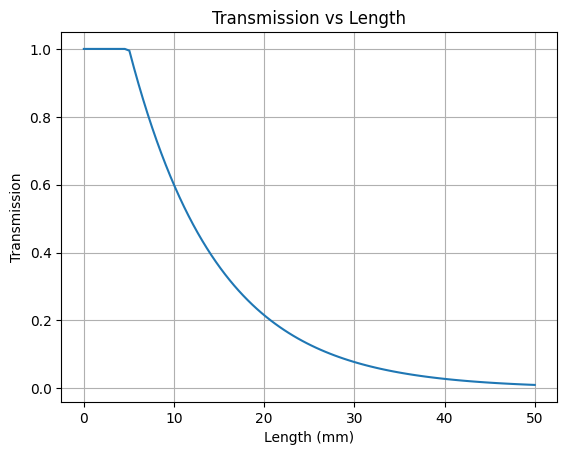

In [54]:
xlist = np.linspace(0, 50, 100)
ylist = [transmisson(optical_density(x)) for x in xlist]
plt.plot(xlist, ylist)
plt.xlabel("Length (mm)")
plt.ylabel("Transmission")
plt.title("Transmission vs Length")
plt.grid()
plt.show()

# 波長依存性

In [55]:
data = pd.read_csv("../data/1000000.csv", header=0, index_col=0)
print(data)

               equiped    handy
centerlength                   
785           0.000366  0.00231
633           0.000244  0.00139
561           0.000146  0.00092
532           0.000157  0.00092
488           0.000020  0.00005


In [56]:
data["ratio"] = data["handy"] / data["equiped"]


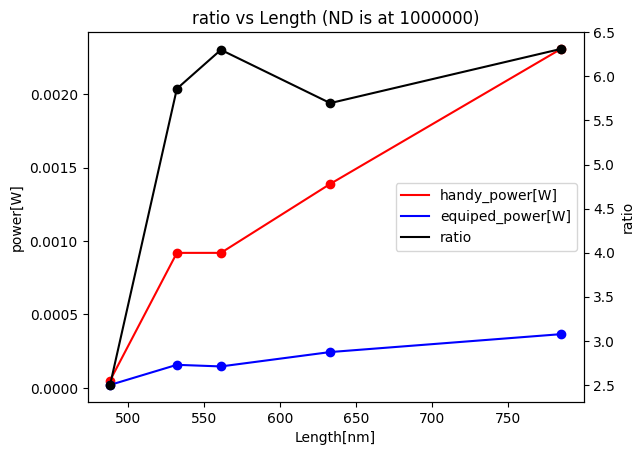

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(data.index, data["handy"], label="handy_power[W]", color="red")
ax1.scatter(data.index, data["handy"], color="red")

ax1.plot(data.index, data["equiped"], label="equiped_power[W]", color="blue")
ax1.scatter(data.index, data["equiped"], color="blue")


ax2 = ax1.twinx()

ax2.plot(data.index, data["ratio"], label="ratio", color="black")
ax2.scatter(data.index, data["ratio"], color="black")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="center right")
ax1.set_xlabel("Length[nm]")
ax1.set_ylabel("power[W]")
ax2.set_ylabel("ratio")

plt.title("ratio vs Length (ND is at 1000000)")

plt.show()